In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

In [2]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
from utils import train_transforms, test_transforms, visualise_transformation

In [4]:
from torchvision import datasets
train_data= datasets.CIFAR10(root= '../data', train= True, download= True, transform= train_transforms)
test_data= datasets.CIFAR10(root= '../data', train= False, download= True, transform= test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
dataloader_args= dict(shuffle= True, batch_size= 64, num_workers= 2, pin_memory= True) if torch.cuda.is_available() else dict(shuffle= True, batch_size= 64)
train_loader= torch.utils.data.DataLoader(train_data, **dataloader_args)
test_loader= torch.utils.data.DataLoader(test_data, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


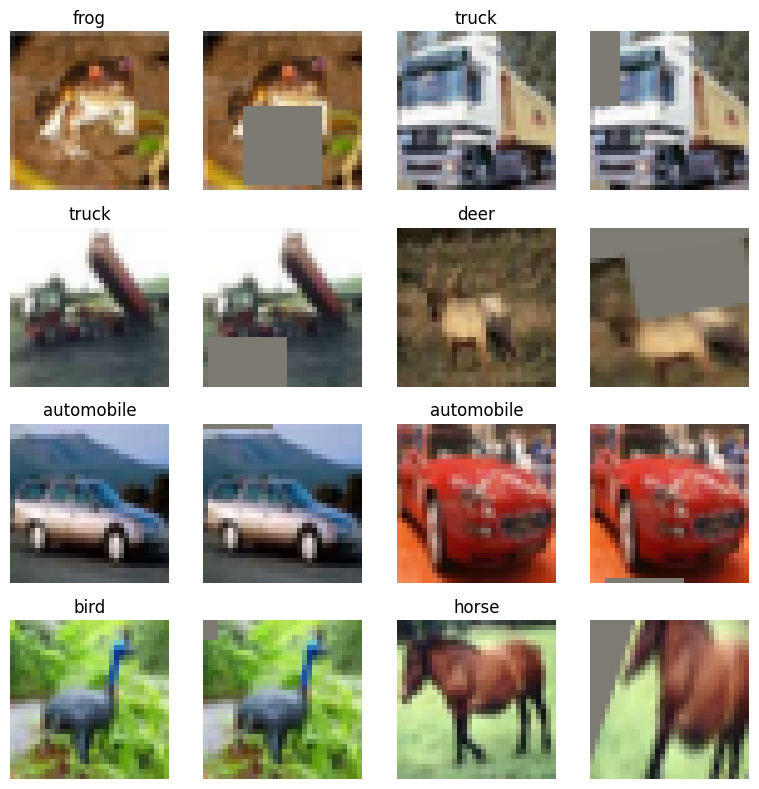

In [6]:
visualise_transformation()

In [7]:
from model import Net
model= Net().to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 16, 16]           9,248
           Conv2d-14           [-1, 32,

/content/model.py:112: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [8]:
from train_test import train, test

In [9]:
from torch.optim.lr_scheduler import OneCycleLR

epochs = 50
max_lr = 0.02  # The maximum learning rate, adjust as needed
base_lr = 0.001 # The base learning rate (or initial learning rate), adjust as needed
optimizer = optim.SGD(model.parameters(), lr=base_lr, momentum=0.9)

# Initialize the OneCycleLR scheduler
scheduler = OneCycleLR(optimizer, max_lr=max_lr, epochs=epochs, steps_per_epoch=len(train_loader))

learning_rate=[]
train_accuracy=[]
test_accuracy=[]
train_losses=[]
test_losses=[]

for epoch in range(1, epochs + 1):
    print("EPOCH:", epoch)

    print('Learning rate:', optimizer.param_groups[0]['lr'],'\n')
    learning_rate.append(optimizer.param_groups[0]['lr'])

    train_acc,train_loss= train(model, device, train_loader, optimizer,scheduler)
    test_acc,test_loss= test(model, device, test_loader)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

EPOCH: 1
Learning rate: 0.0007999999999999986 



Loss=1.712994933128357 Accuracy=34.92: 100%|██████████| 782/782 [00:32<00:00, 24.21it/s]



Test set: Average loss: 1.4226, Accuracy: 4799/10000 (47.99%)

EPOCH: 2
Learning rate: 0.0010098186752793593 



Loss=1.691594123840332 Accuracy=44.29: 100%|██████████| 782/782 [00:28<00:00, 27.52it/s]



Test set: Average loss: 1.3318, Accuracy: 5158/10000 (51.58%)

EPOCH: 3
Learning rate: 0.0016301030601807778 



Loss=1.7734488248825073 Accuracy=49.05: 100%|██████████| 782/782 [00:28<00:00, 27.02it/s]



Test set: Average loss: 1.0929, Accuracy: 6118/10000 (61.18%)

EPOCH: 4
Learning rate: 0.002633739144717484 



Loss=1.7394887208938599 Accuracy=52.95: 100%|██████████| 782/782 [00:28<00:00, 27.35it/s]



Test set: Average loss: 1.0394, Accuracy: 6315/10000 (63.15%)

EPOCH: 5
Learning rate: 0.0039768557635311355 



Loss=1.1308039426803589 Accuracy=55.89: 100%|██████████| 782/782 [00:27<00:00, 28.18it/s]



Test set: Average loss: 0.9446, Accuracy: 6604/10000 (66.04%)

EPOCH: 6
Learning rate: 0.005600742302099823 



Loss=1.0252436399459839 Accuracy=57.86: 100%|██████████| 782/782 [00:27<00:00, 28.47it/s]



Test set: Average loss: 0.8377, Accuracy: 7034/10000 (70.34%)

EPOCH: 7
Learning rate: 0.00743441506827219 



Loss=1.2041618824005127 Accuracy=60.15: 100%|██████████| 782/782 [00:27<00:00, 28.42it/s]



Test set: Average loss: 0.8025, Accuracy: 7159/10000 (71.59%)

EPOCH: 8
Learning rate: 0.009397720147320304 



Loss=1.7499594688415527 Accuracy=62.33: 100%|██████████| 782/782 [00:28<00:00, 27.45it/s]



Test set: Average loss: 0.7690, Accuracy: 7303/10000 (73.03%)

EPOCH: 9
Learning rate: 0.011404837107816005 



Loss=0.7936951518058777 Accuracy=63.36: 100%|██████████| 782/782 [00:27<00:00, 28.50it/s]



Test set: Average loss: 0.7267, Accuracy: 7431/10000 (74.31%)

EPOCH: 10
Learning rate: 0.013368030403554734 



Loss=0.904520571231842 Accuracy=64.73: 100%|██████████| 782/782 [00:28<00:00, 27.22it/s]



Test set: Average loss: 0.7495, Accuracy: 7409/10000 (74.09%)

EPOCH: 11
Learning rate: 0.015201484489405396 



Loss=0.8455974459648132 Accuracy=65.89: 100%|██████████| 782/782 [00:27<00:00, 28.10it/s]



Test set: Average loss: 0.6855, Accuracy: 7622/10000 (76.22%)

EPOCH: 12
Learning rate: 0.01682505500964325 



Loss=0.5406679511070251 Accuracy=66.87: 100%|██████████| 782/782 [00:27<00:00, 28.24it/s]



Test set: Average loss: 0.6475, Accuracy: 7776/10000 (77.76%)

EPOCH: 13
Learning rate: 0.018167772085981033 



Loss=1.1234341859817505 Accuracy=67.64: 100%|██████████| 782/782 [00:27<00:00, 28.78it/s]



Test set: Average loss: 0.6629, Accuracy: 7698/10000 (76.98%)

EPOCH: 14
Learning rate: 0.01917094256878704 



Loss=1.8618474006652832 Accuracy=68.39: 100%|██████████| 782/782 [00:28<00:00, 27.62it/s]



Test set: Average loss: 0.6063, Accuracy: 7926/10000 (79.26%)

EPOCH: 15
Learning rate: 0.01979071564519008 



Loss=1.474875569343567 Accuracy=69.09: 100%|██████████| 782/782 [00:27<00:00, 28.32it/s]



Test set: Average loss: 0.6331, Accuracy: 7860/10000 (78.60%)

EPOCH: 16
Learning rate: 0.019999999934125337 



Loss=1.1522380113601685 Accuracy=69.90: 100%|██████████| 782/782 [00:27<00:00, 28.10it/s]



Test set: Average loss: 0.5806, Accuracy: 8029/10000 (80.29%)

EPOCH: 17
Learning rate: 0.01995964014568637 



Loss=1.206986904144287 Accuracy=70.23: 100%|██████████| 782/782 [00:30<00:00, 25.75it/s]



Test set: Average loss: 0.5903, Accuracy: 7940/10000 (79.40%)

EPOCH: 18
Learning rate: 0.019839091513024387 



Loss=0.6049054861068726 Accuracy=71.19: 100%|██████████| 782/782 [00:27<00:00, 28.09it/s]



Test set: Average loss: 0.5745, Accuracy: 8021/10000 (80.21%)

EPOCH: 19
Learning rate: 0.01963932462284814 



Loss=0.9546267986297607 Accuracy=71.66: 100%|██████████| 782/782 [00:27<00:00, 28.34it/s]



Test set: Average loss: 0.5895, Accuracy: 8017/10000 (80.17%)

EPOCH: 20
Learning rate: 0.019361947880696288 



Loss=0.7690184116363525 Accuracy=71.84: 100%|██████████| 782/782 [00:29<00:00, 26.84it/s]



Test set: Average loss: 0.5633, Accuracy: 8098/10000 (80.98%)

EPOCH: 21
Learning rate: 0.019009194561001762 



Loss=0.8102101683616638 Accuracy=72.39: 100%|██████████| 782/782 [00:27<00:00, 28.23it/s]



Test set: Average loss: 0.5390, Accuracy: 8131/10000 (81.31%)

EPOCH: 22
Learning rate: 0.018583904826079144 



Loss=0.8931989669799805 Accuracy=72.77: 100%|██████████| 782/782 [00:28<00:00, 27.89it/s]



Test set: Average loss: 0.5561, Accuracy: 8127/10000 (81.27%)

EPOCH: 23
Learning rate: 0.018089502858807723 



Loss=0.7186185121536255 Accuracy=72.80: 100%|██████████| 782/782 [00:28<00:00, 27.67it/s]



Test set: Average loss: 0.5313, Accuracy: 8193/10000 (81.93%)

EPOCH: 24
Learning rate: 0.017529969293124316 



Loss=1.1351852416992188 Accuracy=73.26: 100%|██████████| 782/782 [00:29<00:00, 26.69it/s]



Test set: Average loss: 0.5365, Accuracy: 8195/10000 (81.95%)

EPOCH: 25
Learning rate: 0.016909809164299395 



Loss=0.6327943205833435 Accuracy=74.00: 100%|██████████| 782/782 [00:28<00:00, 27.42it/s]



Test set: Average loss: 0.5485, Accuracy: 8152/10000 (81.52%)

EPOCH: 26
Learning rate: 0.01623401563704201 



Loss=0.4803125560283661 Accuracy=74.00: 100%|██████████| 782/782 [00:30<00:00, 25.69it/s]



Test set: Average loss: 0.5168, Accuracy: 8249/10000 (82.49%)

EPOCH: 27
Learning rate: 0.015508029803473477 



Loss=1.1063408851623535 Accuracy=74.47: 100%|██████████| 782/782 [00:27<00:00, 27.94it/s]



Test set: Average loss: 0.5222, Accuracy: 8256/10000 (82.56%)

EPOCH: 28
Learning rate: 0.014737696874652937 



Loss=0.8445838689804077 Accuracy=74.68: 100%|██████████| 782/782 [00:29<00:00, 26.96it/s]



Test set: Average loss: 0.5233, Accuracy: 8236/10000 (82.36%)

EPOCH: 29
Learning rate: 0.013929219118374817 



Loss=1.2414469718933105 Accuracy=74.98: 100%|██████████| 782/782 [00:27<00:00, 28.47it/s]



Test set: Average loss: 0.5220, Accuracy: 8246/10000 (82.46%)

EPOCH: 30
Learning rate: 0.013089105922155451 



Loss=0.7415872812271118 Accuracy=75.17: 100%|██████████| 782/782 [00:27<00:00, 27.95it/s]



Test set: Average loss: 0.5035, Accuracy: 8319/10000 (83.19%)

EPOCH: 31
Learning rate: 0.012224121383472243 



Loss=0.6718021035194397 Accuracy=75.54: 100%|██████████| 782/782 [00:28<00:00, 27.20it/s]



Test set: Average loss: 0.4986, Accuracy: 8357/10000 (83.57%)

EPOCH: 32
Learning rate: 0.01134122984922799 



Loss=0.5887884497642517 Accuracy=75.86: 100%|██████████| 782/782 [00:27<00:00, 28.11it/s]



Test set: Average loss: 0.4884, Accuracy: 8384/10000 (83.84%)

EPOCH: 33
Learning rate: 0.010447539842924613 



Loss=0.36136770248413086 Accuracy=75.90: 100%|██████████| 782/782 [00:27<00:00, 28.04it/s]



Test set: Average loss: 0.5030, Accuracy: 8292/10000 (82.92%)

EPOCH: 34
Learning rate: 0.009550246831011652 



Loss=0.4298750162124634 Accuracy=76.54: 100%|██████████| 782/782 [00:28<00:00, 27.03it/s]



Test set: Average loss: 0.4936, Accuracy: 8357/10000 (83.57%)

EPOCH: 35
Learning rate: 0.008656575289221285 



Loss=0.5603710412979126 Accuracy=76.89: 100%|██████████| 782/782 [00:28<00:00, 27.30it/s]



Test set: Average loss: 0.4818, Accuracy: 8404/10000 (84.04%)

EPOCH: 36
Learning rate: 0.007773720535337653 



Loss=0.9594925045967102 Accuracy=77.20: 100%|██████████| 782/782 [00:27<00:00, 27.95it/s]



Test set: Average loss: 0.4851, Accuracy: 8374/10000 (83.74%)

EPOCH: 37
Learning rate: 0.006908790796728835 



Loss=0.8711182475090027 Accuracy=77.35: 100%|██████████| 782/782 [00:27<00:00, 28.01it/s]



Test set: Average loss: 0.4718, Accuracy: 8421/10000 (84.21%)

EPOCH: 38
Learning rate: 0.00606874997907966 



Loss=0.2688561677932739 Accuracy=77.65: 100%|██████████| 782/782 [00:28<00:00, 27.89it/s]



Test set: Average loss: 0.4724, Accuracy: 8422/10000 (84.22%)

EPOCH: 39
Learning rate: 0.005260361597117835 



Loss=0.4483916759490967 Accuracy=77.86: 100%|██████████| 782/782 [00:27<00:00, 28.19it/s]



Test set: Average loss: 0.4666, Accuracy: 8440/10000 (84.40%)

EPOCH: 40
Learning rate: 0.004490134318770253 



Loss=0.6878798604011536 Accuracy=78.15: 100%|██████████| 782/782 [00:27<00:00, 28.07it/s]



Test set: Average loss: 0.4655, Accuracy: 8459/10000 (84.59%)

EPOCH: 41
Learning rate: 0.003764269561195852 



Loss=0.7079864740371704 Accuracy=78.44: 100%|██████████| 782/782 [00:28<00:00, 27.90it/s]



Test set: Average loss: 0.4749, Accuracy: 8455/10000 (84.55%)

EPOCH: 42
Learning rate: 0.003088611560621062 



Loss=0.9535312652587891 Accuracy=78.98: 100%|██████████| 782/782 [00:27<00:00, 28.12it/s]



Test set: Average loss: 0.4609, Accuracy: 8464/10000 (84.64%)

EPOCH: 43
Learning rate: 0.0024686003179860386 



Loss=0.3439820408821106 Accuracy=79.14: 100%|██████████| 782/782 [00:27<00:00, 27.99it/s]



Test set: Average loss: 0.4575, Accuracy: 8481/10000 (84.81%)

EPOCH: 44
Learning rate: 0.001909227799255772 



Loss=0.7193525433540344 Accuracy=79.64: 100%|██████████| 782/782 [00:27<00:00, 28.09it/s]



Test set: Average loss: 0.4508, Accuracy: 8513/10000 (85.13%)

EPOCH: 45
Learning rate: 0.0014149977430453647 



Loss=0.8499997854232788 Accuracy=79.68: 100%|██████████| 782/782 [00:27<00:00, 28.09it/s]



Test set: Average loss: 0.4563, Accuracy: 8529/10000 (85.29%)

EPOCH: 46
Learning rate: 0.0009898893991648551 



Loss=0.25376003980636597 Accuracy=80.05: 100%|██████████| 782/782 [00:28<00:00, 27.80it/s]



Test set: Average loss: 0.4457, Accuracy: 8515/10000 (85.15%)

EPOCH: 47
Learning rate: 0.0006373254900395109 



Loss=0.3489566147327423 Accuracy=80.03: 100%|██████████| 782/782 [00:29<00:00, 26.73it/s]



Test set: Average loss: 0.4468, Accuracy: 8519/10000 (85.19%)

EPOCH: 48
Learning rate: 0.0003601446529613887 



Loss=0.6212923526763916 Accuracy=80.52: 100%|██████████| 782/782 [00:28<00:00, 27.86it/s]



Test set: Average loss: 0.4458, Accuracy: 8540/10000 (85.40%)

EPOCH: 49
Learning rate: 0.0001605785850509474 



Loss=0.8505820035934448 Accuracy=80.64: 100%|██████████| 782/782 [00:27<00:00, 27.96it/s]



Test set: Average loss: 0.4463, Accuracy: 8546/10000 (85.46%)

EPOCH: 50
Learning rate: 4.023407494405404e-05 



Loss=0.9852774143218994 Accuracy=80.48: 100%|██████████| 782/782 [00:27<00:00, 28.08it/s]



Test set: Average loss: 0.4410, Accuracy: 8541/10000 (85.41%)



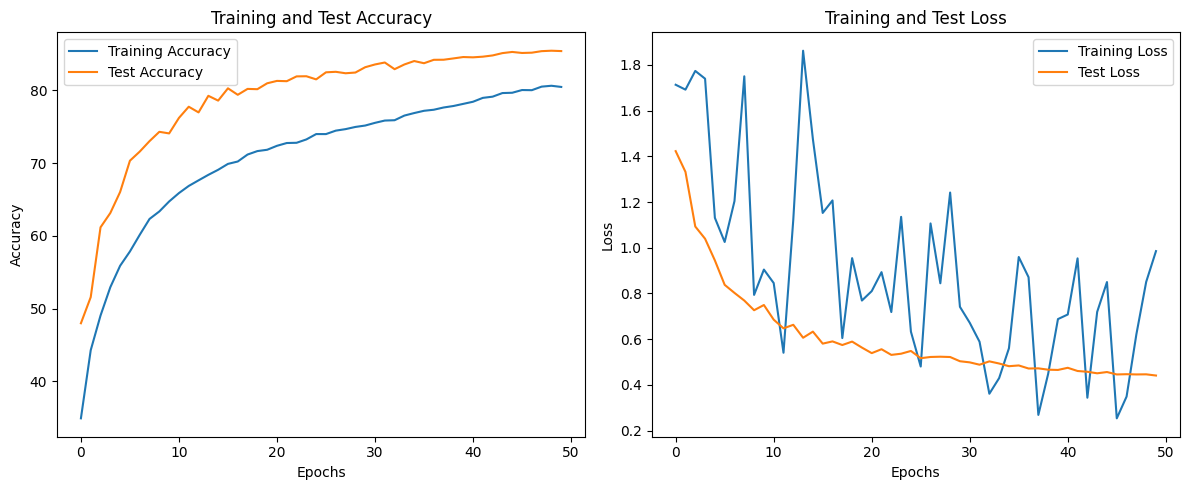

In [10]:
import matplotlib.pyplot as plt


epochs = range(len(train_accuracy))

# Create a new figure
plt.figure(figsize=(12, 5))

# Create a subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Create a subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the figure
plt.tight_layout()
plt.show()

Text(0, 0.5, 'learning rate')

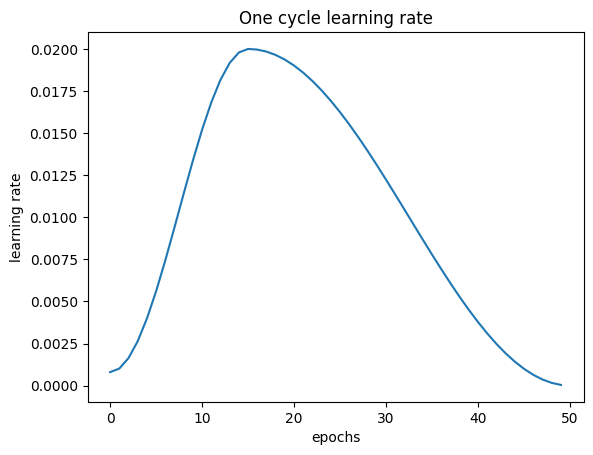

In [12]:
plt.plot(epochs, learning_rate)
plt.title('One cycle learning rate')
plt.xlabel('epochs')
plt.ylabel('learning rate')